In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import IFrame

%matplotlib inline

## Enunciado

In [2]:
IFrame("./Exercício 8 - Cosmologia.pdf", width=800, height=600)

## EDOs

Começamos convertendo as derivadas no tempo comóvel $\eta$ para $a$, lembrando que

\begin{equation*}
d\eta = \frac{1}{a} dt  \Rightarrow \frac{dt}{d\eta} = a
\end{equation*}

Temos

\begin{align*}
  \frac{d}{d\eta} &= \frac{dt}{d\eta}\frac{da}{dt}\frac{d}{da} \\
  &= a \dot{a} \frac{d}{da} \\
  &= a^2 H(a) \frac{d}{da}
\end{align*}

O sistema de equações então se torna

\begin{align*}
  \frac{d\theta_m}{da} &= -\frac{1}{2H} \rho(k, a) - \frac{1}{a} \theta_m\\
  \frac{d\delta_m}{da} &= -\frac{1}{a^2 H} \theta_m \\
  \frac{d\theta_R}{da} &= -\frac{1}{2H} \rho(k, a) + \frac{k^2}{4a^2 H(a)} \delta_R \\
  \frac{d\delta_R}{da} &= -\frac{4}{3a^2 H} \theta_R
\end{align*}

onde definimos

\begin{equation*}
  \rho(k,a) = \rho_m(a) \delta_m + \rho_R(a) \delta_R
\end{equation*}

Assumindo um modelo $\Lambda$CDM chato, temos ainda as relações

\begin{align*}
  H^2(a) &= H_0^2 \left( \Omega_{m0} a^{-3} + \Omega_{R0} a^{-4} + (1 - \Omega_{m0} - \Omega_{R0})\right) \\
\Rightarrow H(a) &= \left(\frac{10^5}{c}\right) h \left( \Omega_{m0} a^{-3} + \Omega_{R0} a^{-4} + (1 - \Omega_{m0} - \Omega_{R0})\right)^{1/2}
\end{align*}
e,
\begin{align*}
  \rho(k, a) &= \rho_{c0} \left( \Omega_{m0} a^{-3} \delta_m + \Omega_{R0} a^{-4} \delta_R \right) \\
  &= \left(\frac{3}{8\pi G} \left(\frac{10^5}{c}\right)^2\right) h^2 \left(\Omega_{m0} a^{-3} \delta_m + \Omega_{R0} a^{-4} \delta_R \right) 
\end{align*}

Todas as grandezas são medidas em potências de Mpc, e $c$ e $G$ possuem seus valores no SI.

Definindo o vetor $y = [\theta_m, \delta_m, \theta_R, \delta_R]$, temos então um sistema da forma

\begin{equation*}
  \frac{dy}{da} = f(y, a, k, h, \Omega_{m0}, \Omega_{R0})
\end{equation*}

## Normalização

Para que a solução obtida para a equação seja numericamente estável, é recomendável trabalhar com números da ordem de 1. Por isso, renormalizamos as equações acima de forma que $c = G = 1$. Denotando como $\overline{y}$ a quantidade normalizada associada a $y$, isto equivale às seguintes relações

\begin{align*}
  \overline{H} &= c H \\
  \overline{\rho} &= Gc^2 \rho \\
  \overline{\theta}_{m,R} &= \frac{\overline{\rho}}{\rho} \frac{H}{\overline{H}} \theta_{m,R} = Gc^2  \frac{1}{c} \theta_{m,R} = Gc \theta_{m,R} \\
  \overline{\delta}_{m,R} &= \frac{H}{\overline{H}} \frac{\overline{\theta_m}}{\theta_m} \delta_{m,R} = \frac{1}{c} Gc \delta_{m,R} = G \delta_{m,R} \\
  \overline{k}^2 &= \frac{\overline{\theta}_R}{\theta_R} \frac{\overline{H}}{H} \frac{\delta_R}{\overline{\delta}_R} k = Gc \cdot c \cdot \frac{1}{G} k = c^2 k
\end{align*}

## Raio do horizonte comóvel

O raio do horizonte comóvel associado ao redshift $a$ é dado por

\begin{align*}
  \chi_{com} = \int_0^{\chi_{com}} d\chi = \int_0^{\eta} d\eta = \int_0^t \frac{dt}{a} = \int_0^a \frac{da}{a \dot{a}} = c \int_0^a \frac{da}{a^2 \overline{H}(a)}
\end{align*}

## $k_{eq}$

A igualdade radiação-matéria ocorre quando 

\begin{align*}
  \rho_m &= \rho_R \\
  \rho_{c0} \Omega_{m0}\frac{1}{a_{eq}^3} &= \rho_{c0} \Omega_{R0} \frac{1}{a_{eq}^4} \\
  a_{eq} &= \frac{\Omega_{R0}}{\Omega_{m0}}
\end{align*}

Veremos aqui duas diferentes definições para o número de onda $k_{eq}$. O primeiro corresponde ao inverso da distância (comóvel) de Hubble no instante da igualdade, ou seja

\begin{equation*}
  k_{eq}^{H} = a_{eq} \frac{H(a_{eq})}{c}
\end{equation*}

A segunda definição corresponde ao número de onda que está entrando no horizonte comóvel no instante da igualdade

\begin{align*}
  k_{eq}^{hor.com} &= \frac{2\pi}{\chi_{com}(a_{eq})} \\
\end{align*}

In [3]:
## Constants
import astropy.units as u
from astropy.constants import G, c

G = G.to(u.m**3 * u.kg**-1 * u.s**-2).value
c = c.to(u.m * u.s**-1).value
pi = np.pi

## Cosmological parameters
h = 0.73
Om0 = 0.24
OR0 = 8e-5

In [4]:
## Functions
def H_function(a, h, Om0, OR0):
    factor = 1e5
    value = h * np.sqrt(Om0 * a**-3  +  OR0 * a**-4  +  (1-Om0-OR0))
    return factor * value

def rho_function(k, a, y, h, Om0, OR0):
    delta_m = y[1]
    delta_R = y[3]
    factor = 3. / (8*pi)  *  (1e5)**2
    value = h**2 * (Om0 * a**-3 * delta_m  +  OR0 * a**-4 * delta_R)
    return factor * value

def f(a, y, k, h, Om0, OR0):
    H = H_function(a, h, Om0, OR0)
    rho = rho_function(k, a, y, h, Om0, OR0)
    dyda = np.zeros(4)
    
    dyda[0] = -rho / (2*H)  -  y[0] / a
    dyda[1] = -y[0] / (a**2 * H)
    dyda[2] = -rho / (2*H)  +  k**2 / (4 * a**2 * H) * y[3]
    dyda[3] = -4. / (3 * a**2 * H)  *  y[2]
    
    return dyda

from scipy.integrate import quad

def comoving_horizon(a, h, Om0, OR0):
    """Comoving horizon at scale factor a, in Mpc
    """
    factor = c
    
    def integrand(a):
        return 1. / (a**2 * H_function(a, h, Om0, OR0))
    
    chi, *_ = quad(integrand, 0., a)
    return c * chi

def keq_comoving_horizon(h, Om0, OR0):
    """Wavenumber of matter-radiation equality, in Mpc^{-1}.
    """
    aeq = OR0 / Om0
    horizon = comoving_horizon(aeq, h, Om0, OR0)
    return 2.*pi / horizon

def keq_hubble(h, Om0, OR0):
    aeq = OR0 / Om0
    return c**-1 * aeq * H_function(aeq, h, Om0, OR0)

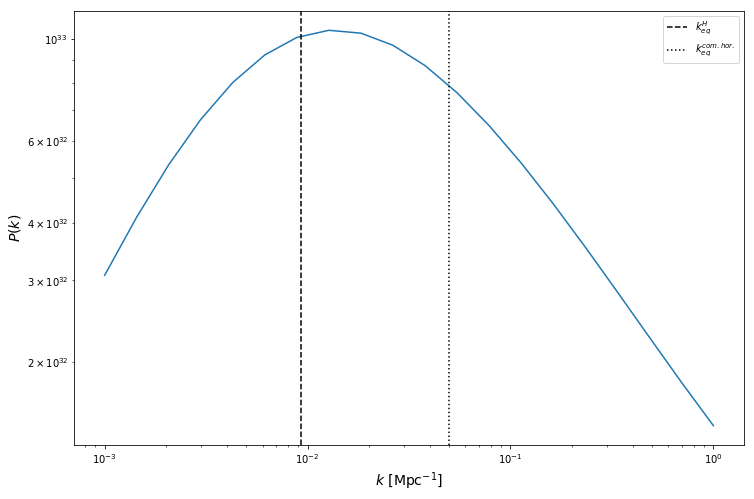

In [5]:
from scipy.integrate import solve_ivp

def Pk_function(k, h, Om0, OR0):
    Pk = np.zeros_like(k)

    k = k * c

    a_in = 1e-8
    a_f = 1.
    for i, k_ in enumerate(k):
        y_in = [0., np.sqrt(k_), 0., np.sqrt(k_)]

        solution = solve_ivp(fun=lambda t, y: f(t, y, k_, h, Om0, OR0), 
                             t_span=(a_in, a_f),
                             y0=y_in,
                             method='RK45',
                             t_eval=[a_f])
        theta_m, delta_m, theta_R, delta_R = solution.y.T[-1]

        Pk[i] = (G**-1 * delta_m)**2
    return Pk

def plot_Pk(h=h, Om0=Om0, OR0=OR0, normalize=False):
    k = np.logspace(-3, 0, 20)
    Pk = Pk_function(k, h, Om0, OR0)
    keq_h = keq_hubble(h, Om0, OR0)
    keq_c = keq_comoving_horizon(h, Om0, OR0)
    
    if normalize:
        Pk = Pk/Pk.max()

    fig, ax = plt.subplots(1,1, figsize=(12, 8))
    ax.loglog()
    ax.plot(k, Pk);
    ax.axvline(keq_h, color="k", ls="dashed", label=r"$k_{eq}^{H}$")
    ax.axvline(keq_c, color="k", ls="dotted", label=r"$k_{eq}^{com.hor.}$")
    ax.set_xlabel(r"$k$ [Mpc$^{-1}]$", fontsize=14)
    ax.set_ylabel(r"$P(k)$", fontsize=14)
    ax.legend();
    return ax;
    
plot_Pk()

## Comportamento quando $\Omega_{R0} \rightarrow 0$

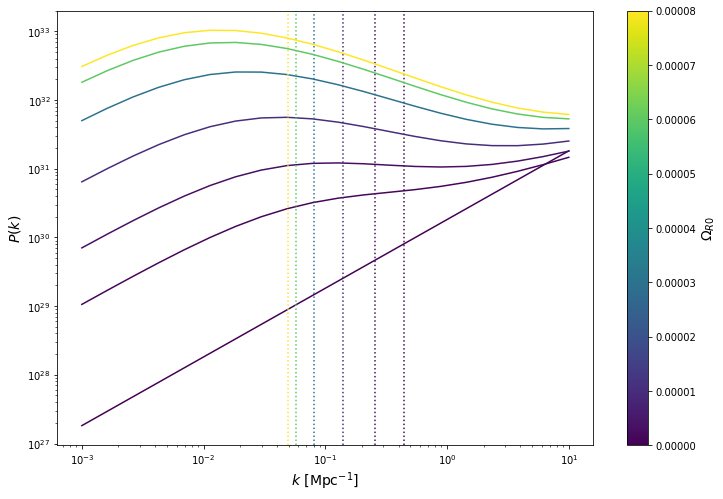

In [6]:
import matplotlib.pyplot as plt
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=0., vmax=OR0))
sm._A = []

k = np.logspace(-3, 1, 20)
ORs = [0., 1e-6, 3e-6, 1e-5, 3e-5, 6e-5, 8e-5]
Pks = [Pk_function(k, h, Om0, OR) for OR in ORs]

fig, ax = plt.subplots(1,1, figsize=(12, 8))

cb = fig.colorbar(sm)
cb.set_label(r"$\Omega_{R0}$", fontsize=14)
ax.loglog()
for OR, Pk in zip(ORs, Pks):
    try:
        keq_c = keq_comoving_horizon(h, Om0, OR)
        ax.axvline(keq_c, color=sm.to_rgba(OR), ls="dotted", label=r"$k_{eq}^{com.hor.}$")
    except ZeroDivisionError:
        pass
    ax.plot(k, Pk, c=sm.to_rgba(OR))

ax.set_xlabel(r"$k$ [Mpc$^{-1}]$", fontsize=14)
ax.set_ylabel(r"$P(k)$", fontsize=14);

Vemos que quando $\Omega_{R0}$ se aproxima de 0, a era da radiação dura cada vez menos tempo, por isso o horizonte comóvel cresce menos nesta época, e "engole" menos modos. Isso faz com que menos modos tenham seu crescimento congelado durante a era da radiação (modos com $k > k_{eq}^{hor.com.}$), por isso o pico se move para a direita, e o espectro de potência se aproxima cada vez mais da sua forma primordial invariante de escala.

Por outro lado, quanto maior a densidade de radiação maior é a função de Hubble em tempos remotos, o que faz com que os modos não amortecidos (k pequeno) crescam mais vigorosamente; daí a reta assintótica para k pequeno ficar cada vez mais alta.

## Gráfico dinâmico

In [7]:
from ipywidgets import interact_manual, fixed
import ipywidgets as widgets
#y axis scale weird
#fix k_eq

interact_manual(plot_Pk, h=(0., 1., 0.01), Om0=(0., 1., 0.01), OR0=(0., 1e-4, 0.000001))

interactive(children=(FloatSlider(value=0.73, description='h', max=1.0, step=0.01), FloatSlider(value=0.24, de…

<function __main__.plot_Pk(h=0.73, Om0=0.24, OR0=8e-05, normalize=False)>

## Comparação com CLASS

In [8]:
## Calculando Tcmb0
h_hub = h
from astropy.constants import k_B, h

k_B = k_B.value
h_pl = h.value
h = h_hub

Neff = 3.046
H_SI = (h * 100 * u.km * u.s**-1 * u.Mpc**-1)
H_SI = H_SI.to(u.s**-1).value

#neutrino_factor = Neff * 7./8 * np.power(4./11, 4./3) + 1
neutrino_factor = 1  # Só fótons
rho_critical = 3 * H_SI**2 / (8 * pi * G)
a_B = 8 * pi**5 * k_B**4  /  (15 * h_pl**3 * c**5)

Tcmb0 = np.power(OR0 * rho_critical * neutrino_factor**-1 * a_B**-1, 1./4)

In [9]:
from classy import Class

ks = np.logspace(-3, 0, 20)

params = {
        'output': 'mPk',
        'z_pk': 0,
        'Omega_b': 0.005,
        'T_cmb': Tcmb0,
        #'omega_k': cosmology['omega_k'],
        'h': h,
        'n_s': 1.,
        'sigma8': 1.0,
        'Omega_cdm': Om0,
        'YHe': 0.2,
        }
cosmo = Class()
cosmo.set(params)
cosmo.compute()

pks_class = np.array([cosmo.pk_lin(k, 0) for k in ks])

cosmo.struct_cleanup()
cosmo.empty()

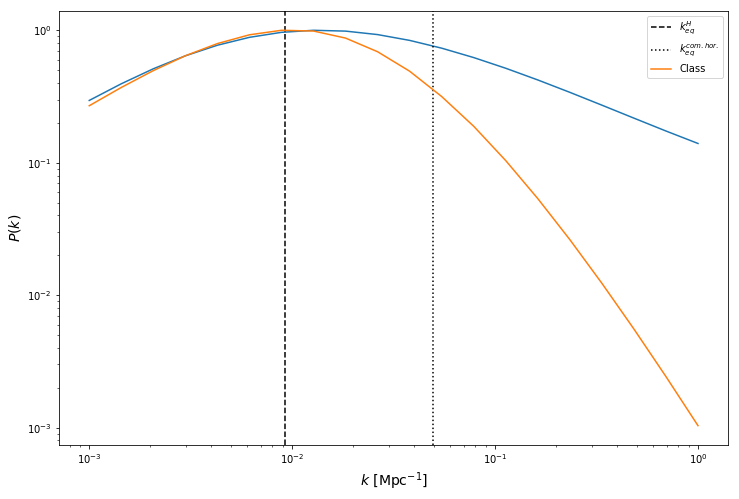

In [10]:
ax = plot_Pk(normalize=True)
ax.plot(ks, pks_class/pks_class.max(), label="Class")
ax.legend();

Nossa contas foram feitas no limite subhorizonte. Não devia ser ao contrário (Class concordando conosco para k grande?). Será que o problema apareceu ao normalizar pela amplitude máxima?